In [2]:
# -*- coding: utf-8 -*-

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from html_table_parser import parser_functions as parse
from time import sleep
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
import lxml
import requests
import html5lib
pd.options.display.max_rows = 50

In [3]:
table_pages = ['https://en.wikipedia.org/wiki/List_of_battles_before_301',
                'https://en.wikipedia.org/wiki/List_of_battles_301%E2%80%931300',
               'https://en.wikipedia.org/wiki/List_of_battles_1301%E2%80%931600',
               'https://en.wikipedia.org/wiki/List_of_battles_since_2001']

In [4]:
list_pages = ['https://en.wikipedia.org/wiki/List_of_battles_1601%E2%80%931800',
               'https://en.wikipedia.org/wiki/List_of_battles_1801%E2%80%931900',
               'https://en.wikipedia.org/wiki/List_of_battles_1901%E2%80%932000',]

In [5]:
title_list = []
link_list = []

In [6]:
def list_battles(url):
    req = requests.get(url)
    print req.status_code
    era = req.content
    era_soup = BeautifulSoup(era)
    bullets = era_soup.find_all('li')
    
    for bullet in bullets:
        if 'title' in str(bullet):
            if 'Action' or 'Battle' or 'Siege' or 'Operation' or 'Fall' in str(bullet):
                if 'List+of+battles' not in str(bullet):
                    if 'footer' not in str(bullet):
                        link = bullet.a['href']
                        link_list.append(link)

                        title = bullet.a['title']
                        title_list.append(title)
                    else:
                        print 'NEXT ENTRY: ' + str(bullet)
                else:
                    print 'NEXT ENTRY: ' + str(bullet)
            else:
                print 'NEXT ENTRY: ' + str(bullet)
        else: 
            print 'NEXT ENTRY' + str(bullet)
                    

In [7]:
for url in list_pages:
    list_battles(url)

200


c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file c:\users\earsht\appdata\local\continuum\anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


NEXT ENTRY<li class="toclevel-1 tocsection-1"><a href="#Early_17th_century_.281601.E2.80.9350.29"><span class="tocnumber">1</span> <span class="toctext">Early 17th century (1601–50)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-2"><a href="#Late_17th_century_.281651.E2.80.931700.29"><span class="tocnumber">2</span> <span class="toctext">Late 17th century (1651–1700)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-3"><a href="#Early_18th_century_.281701.E2.80.9350.29"><span class="tocnumber">3</span> <span class="toctext">Early 18th century (1701–50)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-4"><a href="#Late_18th_century_.281751.E2.80.931800.29"><span class="tocnumber">4</span> <span class="toctext">Late 18th century (1751–1800)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-5"><a href="#External_links"><span class="tocnumber">5</span> <span class="toctext">External links</span></a></li>
NEXT ENTRY<li><a class="external text" href="h

In [8]:
df_late_battles = pd.concat([pd.Series(link_list), pd.Series(title_list)], axis = 1).drop_duplicates()

In [9]:
df_late_battles = df_late_battles.rename(columns = {0:'url', 1:'Battle'})

In [10]:
df_late_battles

,url,Battle
0,/wiki/Battle_of_Bantam,Battle of Bantam
2,/wiki/Siege_of_Nagykanizsa,Siege of Nagykanizsa
3,/wiki/Battle_of_Sluis_(1603),Battle of Sluis (1603)
5,/wiki/Battle_of_Bra%C8%99ov,Battle of Brașov
6,/wiki/Battle_of_Dobrynichi,Battle of Dobrynichi
8,/wiki/Battle_of_Kircholm,Battle of Kircholm
9,/wiki/Battle_of_Cape_Rachado,Battle of Cape Rachado
11,/w/index.php?title=Battle_of_Gol&action=edit&r...,Battle of Gol (page does not exist)
12,/wiki/Siege_of_Groenlo_(1606)#Spinola.27s_siege,Siege of Groenlo (1606)
13,/wiki/Battle_of_Gibraltar_(1607),Battle of Gibraltar (1607)


In [11]:
df_late_battles[~df_late_battles['Battle'].str.contains('Battle' or 'Operation')]

,url,Battle
2,/wiki/Siege_of_Nagykanizsa,Siege of Nagykanizsa
12,/wiki/Siege_of_Groenlo_(1606)#Spinola.27s_siege,Siege of Groenlo (1606)
15,/wiki/Siege_of_Troitse-Sergiyeva_Lavra,Siege of Troitse-Sergiyeva Lavra
18,/wiki/Siege_of_Smolensk_(1609%E2%80%9311),Siege of Smolensk (1609–11)
21,/wiki/English_East_India_Company,English East India Company
27,/wiki/Siege_of_Plze%C5%88,Siege of Plzeň
43,/wiki/Capture_of_Bahia,Capture of Bahia
46,/wiki/Siege_of_Breda_(1624),Siege of Breda (1624)
47,/wiki/Recapture_of_Bahia,Recapture of Bahia
49,/wiki/Action_of_1_February_1625,Action of 1 February 1625


In [12]:
df_late_battles.to_csv('battle_list_1600-', encoding = 'utf-8')

In [13]:
df_late_battles = pd.read_csv('battle_list_1600-.csv', encoding = 'utf-8')

In [14]:
df_late_battles = df_late_battles.drop(['Column1', 'Column4'], axis = 1)
df_late_battles.columns = df_late_battles.iloc[0]
df_late_battles = df_late_battles.drop(0)

In [15]:
battle_list = []
link_list = []

In [16]:
def early_battles(link):
    req = requests.get(link)
    print req.status_code
    era = req.content
    era_soup = BeautifulSoup(era)
    tables = era_soup.find_all('table', {'class': 'wikitable'})

    for table in tables:
        cells= table.find_all('td')
        for cell in cells:
            if cell.a is not None:
                a = ['Fall', 'Battle', 'Siege', 'Capture', 'Operation', 'Action']
                if any(x in str(cell.a['href']) for x in a):
                    battle_list.append(cell.a['title'])
                    link_list.append(cell.a['href'])

In [17]:
for page in table_pages:
    early_battles(page)

200
200
200
200


In [18]:
df_battles = pd.DataFrame({'battle': battle_list,
                          'link':link_list})

In [19]:
df_battles = df_battles.rename(columns = {'link':'url', 'battle':'Battle'})

In [20]:
len(df_battles)

1600

In [21]:
len(df_late_battles)

1990

In [22]:
df_battles.head()

,Battle,url
0,Battle of Banquan,/wiki/Battle_of_Banquan
1,Battle of Zhuolu,/wiki/Battle_of_Zhuolu
2,Battle of Uruk,/wiki/Battle_of_Uruk
3,Battle of Mingtiao,/wiki/Battle_of_Mingtiao
4,Battle of the Ten Kings,/wiki/Battle_of_the_Ten_Kings


In [23]:
df_url = pd.concat([df_late_battles, df_battles]).reset_index(drop = True)

In [24]:
len(df_url)

3590

In [25]:
len(df_url.drop_duplicates())

3578

In [26]:
s_req = requests.get('https://en.wikipedia.org/Alexander_the_Great')

soup = BeautifulSoup(s_req.text)

ul = soup.find('ul', {'class':'redirectText'})

In [27]:
if ul is not None:
    print 'works'

In [28]:
df_battle_all = pd.DataFrame()
df_battle = pd.DataFrame()
def table_scrape(url, name):
#     sleep(1)
    
    link = 'https://en.wikipedia.org' + url
    
    b_req = requests.get(link)

    soup = BeautifulSoup(b_req.text)
    
    bell = soup.find('table', {'class':'infobox vevent'})
    
    if bell is not None:


        details = pd.DataFrame(parse.make2d(bell))
    else:
        return b_req
    clean_rows = details.drop_duplicates(0).set_index(0,drop = True).loc[['Date', 'Location', 'Result'],:]

    clean_col = clean_rows.transpose().reset_index(drop = True)
    
    if 'Commanders and leaders' in str(details[0]):
        nothing = 'nothing'
    
    else:
        return link


    
    df_x_bells = pd.DataFrame()

    html_table = bell.find_all('tr')
    bell_list = []
    bell_y_list = []
    
    for index, cell in zip(range(0, len(html_table)), html_table):
        if 'Commanders and leaders' in str(cell):
            leaders = html_table[index + 1]
            cells = leaders.find_all('td')
            count = 0
            for cell in cells:
                count += 1
                anchors = cell.find_all('a')
                for anchor in anchors:
                    if 'title' in str(anchor):
                        if 'class="image"' in str(anchor):
                            cl = 'image'
                        elif 'class="thumbborder"' in str(anchor):
                            cl = 'thumb'
                        elif 'cite_note' in str(anchor):
                            cl = 'cite'
                        elif 'disambiguation needed' in str(anchor):
                            cl = 'disam'
                        elif 'cnote_g' in str(anchor):
                            cl = 'cnote'
                        else:
                            title = anchor['title']
                            if any(title == x for x in ['Napoleon I','Alexander III of Macedon']):
                                print 'napoleon or alex redirect'
                            
                            ref = anchor['href']
                            link = 'https://en.wikipedia.org' + ref
                            
                            if len(ref) <= 10:
                                t_req = requests.get(link)
                            elif any(ref[8] + ref[9] + ref[10] == x for x in ['tr.', 'ko.', 'ja.', 'th.','da.', 'es.', 'de.', 'it.', 'fr.', 'zh.']):
                                print 'Not English!'
                                link = ref
                                t_req = requests.get(link)
                            elif soup.find('ul', {'class':'redirectText'}) is not None:
                                print 'REDIRECT'
                                print title
                                ul = soup.find('ul', {'class':'redirectText'})
                                a = ul.a
                                redirect = a['href']
                                link = 'https://en.wikipedia.org' + redirect
                                t_req = requests.get(link)
                            else:
                                t_req = requests.get(link)
                       
                            t_soup = BeautifulSoup(t_req.text)
                            if 'Common military ranks in English' in str(t_soup):
                                return t_soup
                                
                            c_name = t_soup.find('title')
                            c_name = str(c_name)
        
                            if c_name:
                                c_name = c_name.replace(' - Wikipedia', '').replace('<title>', '').replace('</title>', '')
                            if 'ex.php?title=' in ref:
                                ref = ref.replace('ex.php?title=', '')
                                ref = ref.replace('&action=edit&redlink=1', '')

                            omit_list = ['Military advisor', 'Wounded in action', 'Prisoner of war', 'Killed in action', 'Surrender (military)', 'Surrendered']
                                
                            if all(c_name != x for x in omit_list):
                                
                            
                                if count == 1:
                                    
                                    bell_list.append(c_name)
                                elif count == 2:
                                    bell_y_list.append(c_name)
    

    for bell in bell_list:
        clean_col['belligerent'] = bell
        df_x_bells = pd.concat([df_x_bells, clean_col])
        df_x_bells = df_x_bells.reset_index(drop = True)

    
    df_y_bells = pd.DataFrame()
    for bell in bell_y_list:
        clean_col['belligerent'] = bell
        df_y_bells = pd.concat([df_y_bells, clean_col])
        df_y_bells = df_y_bells.reset_index(drop = True)
    
    df_y_bells = df_y_bells.rename(columns = {0:'Location'})
    
    if 'Strength' in str(details[0]):
        strength_finder = details[details[0] == 'Strength']
    else:
        return name

    strength_row = strength_finder.index + 1

    strength = details.loc[strength_row]

    strength_x = strength.iloc[0,0]

    strength_y = strength.iloc[0,1]
    
    df_x_bells['own'] = strength_x
    
    df_x_bells['opp'] = strength_y

    df_y_bells['own'] = strength_y
    
    df_y_bells['opp'] = strength_x
    
    if 'Casualties and losses' not in str(details[0]):
        df_x_bells['taken'] = np.NaN
        df_x_bells['inflicted'] = np.NaN
        df_y_bells['taken'] = np.NaN
        df_y_bells['inflicted'] = np.NaN
    
    else:
    
        casualties_finder = details[details[0] == 'Casualties and losses']

        casualties_row = casualties_finder.index + 1

        casualties = details.loc[casualties_row]

        casualties_x = casualties.iloc[0,0]

        casualties_y = casualties.iloc[0,1]

        df_x_bells['taken'] = casualties_x

        df_x_bells['inflicted'] = casualties_y

        df_y_bells['taken'] = casualties_y

        df_y_bells['inflicted'] = casualties_x
    
    
    
    df_x_bells['Battle'] = name
    
    df_y_bells['Battle'] = name
    
    df_x_bells['pos'] = 'L'
    
    df_y_bells['pos'] = 'R'
    
    df_battle = pd.concat([df_x_bells, df_y_bells]).reset_index(drop = True)

    df_battle_all = pd.concat([df_battle_all, df_battle]).reset_index(drop = True).drop_duplicates()
    
    global df_battle_all

<ipython-input-28-0f2ef4c7efad>:183: SyntaxWarning: name 'df_battle_all' is assigned to before global declaration
  global df_battle_all


In [29]:
count = 0
for num, rows in {1:df_url[:200],
             2:df_url[200:400], 
             3:df_url[400:600], 
             4:df_url[600:800],
             5:df_url[800:1000],
             6:df_url[1000:1200],
             7:df_url[1200:1400],
             8:df_url[1400:1600],
             9:df_url[1600:1800],
             10:df_url[1800:2000],
             11:df_url[2000:2200],
             12:df_url[2200:2400],
             13:df_url[2400:2600],
             14:df_url[2600:2800],
             15:df_url[2800:3000],
             16:df_url[3000:3200],
             17:df_url[3200:3400],
             18:df_url[3400:]}.iteritems():
    df_battle = pd.DataFrame()
    df_batch = rows
    for index, row in df_batch.iterrows():
        count += 1
        global count
        print str(count) + '/' + str(len(df_url))
        table_scrape(row['url'], row['Battle'])
    df_battle_all.to_csv('rows_{}.csv'.format(num), encoding = 'utf-8')
    print 'NEW FRAME' + str(num)

<ipython-input-29-092b1f644c94>:24: SyntaxWarning: name 'count' is assigned to before global declaration
  global count


1/3590
2/3590
3/3590
4/3590
5/3590
6/3590
7/3590
8/3590
9/3590
10/3590
11/3590
12/3590
13/3590
14/3590
15/3590
16/3590
17/3590
18/3590
19/3590
20/3590
21/3590
22/3590
Not English!
23/3590
24/3590
25/3590
26/3590
27/3590
28/3590
29/3590
30/3590
31/3590
32/3590
33/3590
34/3590
35/3590
36/3590
37/3590
38/3590
39/3590
40/3590
41/3590
42/3590
43/3590
44/3590
45/3590
46/3590
47/3590
48/3590
49/3590
50/3590
51/3590
52/3590
53/3590
54/3590
55/3590
56/3590
57/3590
58/3590
59/3590
60/3590
61/3590
62/3590
63/3590
64/3590
65/3590
66/3590
67/3590
68/3590
69/3590
70/3590
71/3590
72/3590
73/3590
74/3590
75/3590
76/3590
77/3590
78/3590
79/3590
80/3590
81/3590
82/3590
83/3590
84/3590
85/3590
86/3590
87/3590
88/3590
89/3590
90/3590
91/3590
92/3590
93/3590
94/3590
95/3590
96/3590
97/3590
98/3590
99/3590
100/3590
101/3590
102/3590
103/3590
104/3590
105/3590
106/3590
107/3590
108/3590
109/3590
110/3590
111/3590
112/3590
113/3590
114/3590
115/3590
116/3590
117/3590
118/3590
119/3590
120/3590
121/3590
122/35

In [52]:
row_list = ['rows_1.csv',
 'rows_2.csv',
 'rows_3.csv',
 'rows_4.csv',
 'rows_5.csv',
 'rows_6.csv',
 'rows_7.csv',
 'rows_8.csv',
 'rows_9.csv',
 'rows_10.csv',
 'rows_11.csv',
 'rows_12.csv',
 'rows_13.csv',
 'rows_14.csv',
 'rows_15.csv',
 'rows_16.csv',
 'rows_17.csv',
 'rows_18.csv']

In [53]:
df_comm = pd.DataFrame()
for sheet in row_list:
    df_rows = pd.read_csv(sheet)
    df_comm = pd.concat([df_comm, df_rows]).reset_index(drop = True)

In [54]:
df_comm = df_comm.drop('Unnamed: 0', axis = 1)

In [55]:
len(df_comm)

105012

In [56]:
df_comm.to_csv('battles_dirty.csv', encoding = 'utf-8')

In [7]:
df_comm = pd.read_csv('battles_dirty.csv').drop('Unnamed: 0', axis = 1)

In [8]:
df_comm = df_comm.drop_duplicates()

In [9]:
len(df_comm)

10966

In [10]:
df_comm[df_comm.belligerent.str.contains('Napoleon')]

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
3313,Siege_of_Toulon,29 August – 19 December 1793,"Toulon, France",French Republican victory,Napoleon,"about 4,000 dead","about 22,000\r\r\n37 British ships\r\r\n32 Spa...","32,000 [1]",L,"2,000 dead or wounded,\r\r\n14 French ships of..."
3383,Battle_of_Montenotte,11 and 12 April 1796,"near Cairo Montenotte,[note 1] Italy",French victory,Napoleon,"2,500, 12 guns","6,000, 12 guns","9,000, 18 guns",L,880
3389,Battle_of_Lodi,10 May 1796,"Lodi, present-day Italy",French victory,Napoleon,"3,200 killed or wounded\r\r\n2,000 captured\r\...","9,500\r\r\n14 guns[1]","15,500 infantry\r\r\n2,000 cavalry\r\r\n30 guns",L,"1,000"
3395,Battle_of_Castiglione,5 August 1796,"Castiglione delle Stiviere, present-day Italy",French victory,Napoleon,"Battle: 3,000, 20 guns","Battle: 25,000","Battle: 30,000",L,"Battle: 1,300"
3401,Battle_of_Bassano,8 September 1796,"Bassano, Venetia, present-day Italy",French victory,Napoleon,"600 killed or wounded,\r\r\n3,000 captured,\r\...","11,000","20,000",L,"400 killed, wounded or missing"
3403,Battle_of_the_Bridge_of_Arcole,15 November 1796 (1796-11-15)–\r\r\n17 Novembe...,"Arcole, present-day Italy\r\r\nCoordinates: 45...",French victory[1],Napoleon,"2,200 dead or wounded\r\r\n4,000 men & 11 guns...","24,000","20,000[2]",L,"3,500 dead or wounded\r\r\n1,300 captured or m..."
3407,Battle_of_Mondovì,21 April 1796,"Mondovì, Piedmont, in modern-day Italy",French victory,Napoleon,"1,600, 8 cannons[1]","13,000[1]","17,500[1]",L,600[1]
3409,Battle_of_Rivoli,14–15 January 1797,"Rivoli Veronese, present-day Italy",Decisive French victory[1],Napoleon,"12,000-14,000","28,000","19,000",L,"3,200-5,000"
3450,Battle_of_the_Pyramids,21 July 1798,"Embabeh, near Cairo, Ottoman Egypt\r\r\n30°5′N...",Decisive French victory,Napoleon,"20,000 Mamelukes from Napoleon's own records[5...","25,000[3]","20,000 total\r\r\n3,000 cavalry\r\r\n17,000 in...",L,"29 dead, 260 wounded[4]"
3460,Siege_of_El_Arish,"February 11-19, 1799","Arish, Egypt",French victory,Napoleon,900 killed,"15,500","2,460",L,200 killed


In [11]:
len(df_comm.drop_duplicates())

10966

In [12]:
df_comm = df_comm.drop_duplicates().reset_index(drop = True)

In [13]:
df_comm.to_csv('battles_deduped.csv')

In [10]:
len(df_comm[df_comm.belligerent.str.contains('Napoleon')])

51

In [11]:
df_comm[df_comm.belligerent.str.contains('Scipio')]

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
7117,Battle of Tifernum,297 BC,"Città di Castello (Perugia, Umbria), Italy",Roman victory,Lucius Cornelius Scipio Barbatus,"3,400 dead,\r\r\n830 captured","25,000","20,000",L,"2,000 dead"
7140,Battle of the Lipara Islands,260 BC,"Lipara harbour, Sicily",Carthaginian victory,Gnaeus Cornelius Scipio Asina,4 ships,20 ships,17 ships,R,17 ships captured
7183,Battle of the Ticinus,"November, 218 BC","Right bank of lower Ticino River, present-day ...",Carthaginian victory,Publius Cornelius Scipio,minimal,"6,000 cavalry","3,100 cavalry\r\r\n7,200 velites",R,"2,300"
7186,Battle of Cissa,Fall 218 BC,"Cissa or Tarraco, present-day Spain",Roman victory,Gnaeus Cornelius Scipio Calvus,"6,000 killed,\r\r\n2,000 captured","10,000 infantry,\r\r\n1,000 cavalry","20,000 infantry,\r\r\n2,200 cavalry",R,unknown
7191,Battle of Ebro River,"Spring, 217 BC","Mouth of Ebro River, present-day Spain",Decisive Roman victory,Gnaeus Cornelius Scipio Calvus,"4 sunk,\r\r\n25 captured",40 Quinqueremes,55 Quinqueremes and Triremes,R,Unknown
7207,Battle of Dertosa,Spring 215 BC,"Tortosa, present-day Spain",Roman victory,Gnaeus Cornelius Scipio Calvus,Unknown,"25,000 infantry,\r\r\n4,000 cavalry,\r\r\n20 E...","30,000 infantry,\r\r\n2,800 cavalry",R,Unknown
7208,Battle of Dertosa,Spring 215 BC,"Tortosa, present-day Spain",Roman victory,Publius Cornelius Scipio,Unknown,"25,000 infantry,\r\r\n4,000 cavalry,\r\r\n20 E...","30,000 infantry,\r\r\n2,800 cavalry",R,Unknown
7230,Battle of the Upper Baetis,211 BC,Near Upper Baetis (modern-day Guadalquivir) Ri...,Carthaginian victory,Publius Cornelius Scipio,Unknown,"Total: 48,500,\r\r\n35,000 infantry,\r\r\n3,00...","Total: 53,000,\r\r\n30,000 infantry,\r\r\n3,00...",R,"About 22,000"
7231,Battle of the Upper Baetis,211 BC,Near Upper Baetis (modern-day Guadalquivir) Ri...,Carthaginian victory,Gnaeus Cornelius Scipio Calvus,Unknown,"Total: 48,500,\r\r\n35,000 infantry,\r\r\n3,00...","Total: 53,000,\r\r\n30,000 infantry,\r\r\n3,00...",R,"About 22,000"
7239,Battle of Baecula,208 BC,"Baecula (Santo Tomé, Jaén), present-day Spain",Roman victory; Hasdrubal departed Iberia witho...,Scipio Africanus,"About 6,000 killed,\r\r\n10,000 captured","25,000 men + Iberian allies","35,000 men",R,"2,000"


In [12]:
df_results = pd.read_csv('result_column.csv')

In [13]:
df_results[df_results.Battle == 'Battle_of_Camarón']

,Battle,belligerent,pos,Result,VorD
2987,Battle_of_Camarón,Francisco de Paula Milán,L,Tactical Mexican victory\r\nStrategic French v...,V
2988,Battle_of_Camarón,Jean Danjou,R,Tactical Mexican victory\r\nStrategic French v...,D
2989,Battle_of_Camarón,Jean Vilain — Wikipédia,R,Tactical Mexican victory\r\nStrategic French v...,D
2990,Battle_of_Camarón,Clément Maudet — Wikipédia,R,Tactical Mexican victory\r\nStrategic French v...,D


In [14]:
df_comm[df_comm.Battle == 'Battle_of_Camarón']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
3037,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Francisco de Paula Milán,43 killed\r\r\n19 captured of whom 17 were wou...,3 Foreign Legion Officers\r\r\n62 Legionnaires,"800 cavalry\r\r\n2,200 infantry",L,190 killed\r\r\n300+ wounded
3038,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Jean Danjou,190 killed\r\r\n300+ wounded,"800 cavalry\r\r\n2,200 infantry",3 Foreign Legion Officers\r\r\n62 Legionnaires,R,43 killed\r\r\n19 captured of whom 17 were wou...
3039,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Jean Vilain — Wikipédia,190 killed\r\r\n300+ wounded,"800 cavalry\r\r\n2,200 infantry",3 Foreign Legion Officers\r\r\n62 Legionnaires,R,43 killed\r\r\n19 captured of whom 17 were wou...
3040,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Clément Maudet — Wikipédia,190 killed\r\r\n300+ wounded,"800 cavalry\r\r\n2,200 infantry",3 Foreign Legion Officers\r\r\n62 Legionnaires,R,43 killed\r\r\n19 captured of whom 17 were wou...


In [21]:
df_comm[df_comm.belligerent == 'Ambroise de Loré']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
9181,Battle of La Brossinière,26 September 1423,"La Brossinière, France",French victory,Ambroise de Loré,"800-1,700 killed\r\r\n30 captured, including J...",2 000 soldiers\r\r\n800 archers,"6,000",L,1 knight\r\r\nand a few others (of no title)


In [15]:
df_vl = pd.merge(df_comm, df_results, how = 'outer', on = ['Battle', 'belligerent', 'Result', 'pos'])

In [16]:
df_vl

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken,VorD
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,Heavy losses[2]\r\r\n3000 sick and wounded[1],"35,000[1]\r\r\n40+ cannon","9,000\r\r\n100 small cannon",L,Unknown,V
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor",Unknown,"9,000\r\r\n100 small cannon","35,000[1]\r\r\n40+ cannon",R,Heavy losses[2]\r\r\n3000 sick and wounded[1],D
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,414 killed[3](Spanish source)\r\r\n800 dead or...,"8 Galleys,\r\r\n1,130 soldiers[1](Spanish sour...","3 men-of-war,\r\r\n2 galleys,\r\r\nseveral min...",L,"720 killed,\r\r\n1 man-of-war sunk[3](Spanish ...",V
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"720 killed,\r\r\n1 man-of-war sunk[3](Spanish ...","3 men-of-war,\r\r\n2 galleys,\r\r\nseveral min...","8 Galleys,\r\r\n1,130 soldiers[1](Spanish sour...",R,414 killed[3](Spanish source)\r\r\n800 dead or...,D
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\n52°16′56″N 34°20′...",Russian decisive victory,False Dmitry I,?,"20,000","23,000",L,?,L
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\n52°16′56″N 34°20′...",Russian decisive victory,Fyodor Mstislavsky,?,"23,000","20,000",R,?,W
6,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\nSeptember 27, 1...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Jan Karol Chodkiewicz,"7,600–8,000 killed, captured and dispersed[2]","10,868:[1]:64\r\r\n2,500 cavalry\r\r\n8,368 in...","3,600:[1]:64\r\r\n1,000 infantry\r\r\n2,600 ca...",L,"100 killed,\r\r\n200 wounded[1]:65",V
7,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\nSeptember 27, 1...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Hetmans of the Polish–Lithuanian Commonwealth,"7,600–8,000 killed, captured and dispersed[2]","10,868:[1]:64\r\r\n2,500 cavalry\r\r\n8,368 in...","3,600:[1]:64\r\r\n1,000 infantry\r\r\n2,600 ca...",L,"100 killed,\r\r\n200 wounded[1]:65",V
8,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\nSeptember 27, 1...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Charles IX of Sweden,"100 killed,\r\r\n200 wounded[1]:65","3,600:[1]:64\r\r\n1,000 infantry\r\r\n2,600 ca...","10,868:[1]:64\r\r\n2,500 cavalry\r\r\n8,368 in...",R,"7,600–8,000 killed, captured and dispersed[2]",D
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,"2 ships lost\r\r\n150 dead, many wounded",11 ships,20 ships,L,2 ships lost\r\r\n500 dead,V


In [17]:
df_vl = df_vl.sort('VorD')

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [22]:
df_vl[df_vl.belligerent == 'Ambroise de Loré']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken,VorD
9181,Battle of La Brossinière,26 September 1423,"La Brossinière, France",French victory,Ambroise de Loré,"800-1,700 killed\r\r\n30 captured, including J...",2 000 soldiers\r\r\n800 archers,"6,000",L,1 knight\r\r\nand a few others (of no title),V


In [19]:
df_vl[df_vl.belligerent == 'Saracens']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken,VorD


In [49]:
df_vl.to_csv('additional_results.csv')

In [59]:
df_ar = pd.read_csv('additional_results.csv', encoding = 'utf-8')

In [60]:
df_strength = df_ar.drop(['Unnamed: 0', 'Location', 'Result', 'inflicted', 'taken', 'opp'], axis = 1)

In [61]:
df_strength = df_strength.sort('Battle').reset_index(drop = True)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [ ]:
df_strength_dd = df_strength.drop_duplicates(['own', 'pos'], keep = 'first')

In [ ]:
df_strength_dd.own = df_strength_dd.own.str.replace('\r',' ').str.replace('\n', ' ').replace('\n', ' ')

In [ ]:
df_strength_dd = df_strength_dd.sort('Battle').reset_index(drop = True)

In [ ]:
df_strength_dd

In [ ]:
df_strength_dd.to_csv('strength_entry.csv', encoding = 'utf-8')

In [ ]:
df_strength_new = df_strength.drop_duplicates(['own', 'pos', 'Battle'], keep = 'first')

In [90]:
df_strength_fill = pd.read_excel('strength_entry.xlsx', encoding = 'utf-8')

In [62]:
df_battles = pd.read_csv('battles_deduped.csv', encoding = 'utf-8').drop('Unnamed: 0', axis = 1)

In [63]:
df_battles = df_battles.drop(['taken', 'inflicted'], axis = 1)

In [64]:
df_battles.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L


In [65]:
df_battles[df_battles.Battle.str.contains('Battle_of_Jena')]

,Battle,Date,Location,Result,belligerent,opp,own,pos
1671,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Napoleon,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L
1672,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Louis-Nicolas Davout,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L
1673,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Frederick Louis, Prince of Hohenlohe-Ingelfingen","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R
1674,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Charles William Ferdinand, Duke of Brunswick-W...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R


In [93]:
df_strength_fill[df_strength_fill.Battle.str.contains('Battle_of_Jena')]

,Battle,Date,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
2289,Battle_of_Jena–Auerstedt,14 October 1806,"Frederick Louis, Prince of Hohenlohe-Ingelfingen","120,500 60,000 (Jena); 60,500 (Auerstedt)",R,D,120500.0,NaN,NaN,NaN,NaN,NaN
2290,Battle_of_Jena–Auerstedt,14 October 1806,Napoleon,"67,000 40,000 (Jena); 27,000 (Auerstedt)",L,V,67000.0,NaN,NaN,NaN,NaN,NaN


In [92]:
df_strength_fill.Battle = df_strength_fill.Battle.str.replace(u"â€“",u'–')

In [158]:
df_some_strength = pd.merge(df_battles, df_strength_fill, how = 'outer', on = ['Battle', 'pos']).drop(['own_y', 'belligerent_y', 'Date_y'], axis = 1).rename(columns = {'Date_x':'Date','own_x':'own', 'belligerent_x':'belligerent'})

In [155]:
df_some_strength[df_some_strength.Battle.str.contains('Battle_of_Jena')]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
1671,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Napoleon,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L,V,67000.0,NaN,NaN,NaN,NaN,NaN
1672,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Louis-Nicolas Davout,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L,V,67000.0,NaN,NaN,NaN,NaN,NaN
1673,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Frederick Louis, Prince of Hohenlohe-Ingelfingen","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R,D,120500.0,NaN,NaN,NaN,NaN,NaN
1674,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Charles William Ferdinand, Duke of Brunswick-W...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R,D,120500.0,NaN,NaN,NaN,NaN,NaN


In [96]:
df_test = df_some_strength.iloc[:,9:]

In [97]:
df_str_two = df_some_strength[df_some_strength['Infantry'].isnull() & df_some_strength['Cavalry'].isnull() & df_some_strength['Artillery'].isnull() & df_some_strength['Ships'].isnull() & df_some_strength['Airforce'].isnull() & df_some_strength['Special'].isnull()]

In [98]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_str_two = df_str_two.drop_duplicates(['Battle', 'Date', 'Location', 'Result', 'pos']).drop('VorD', axis = 1)

In [100]:
len(df_str_two)

1353

In [101]:
df_merger = df_strength.drop(['Date', 'belligerent', 'own'], axis = 1)

In [102]:
df_merger = df_merger.drop_duplicates()

In [103]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df_str_two = pd.merge(df_str_two, df_merger, on = ['Battle', 'pos'], how = 'outer').dropna(subset = ['Date', 'Location', 'Result'])

In [196]:
df_str_two = df_str_two.dropna(subset = ['VorD'])

In [24]:
df_str_two.to_csv('strength_entry_two.csv')

In [199]:
df_str_two

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,L
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,W
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,V
3,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,V
5,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,D
6,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Grigory Dolgorukov,"15,000","2,400",R,V
7,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Ōno Harunaga,5000,3000,R,D
9,Battle_of_Tennōji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Tokugawa Ieyasu,"50,000","150,000",L,V
11,Battle_of_Tennōji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Toyotomi Hideyori,"150,000","50,000",R,D
12,Siege_of_Plzeň,19 September - 21 November 1618\r\r\r\n(2 mont...,"Pilsen, Bohemia",Bohemian victory,Ernst von Mansfeld,"4,000 Burghers\r\r\r\n158 cavalry","20,000",L,V


In [186]:
df_partial = pd.read_excel('PARTIAL_strength_entry_two.xlsx', encoding = 'utf-8')

In [187]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df_str_two = df_str_two.drop(['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], axis = 1)

ValueError: labels ['Infantry' 'Cavalry' 'Artillery' 'Ships' 'Airforce' 'Special'] not contained in axis

In [189]:
df_partial = df_partial.drop(['Date', 'Location', 'Result', 'belligerent','own', 'Column1'],axis = 1)

In [190]:
df_partial.columns

Index([u'Battle', u'pos', u'Infantry', u'Cavalry', u'Artillery', u'Ships',
       u'Airforce', u'Special', u'VorD'],
      dtype='object')

In [194]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L


In [193]:
df_finish = pd.merge(df_str_two, df_partial, on = ['Battle', 'pos', 'VorD'], how = 'outer')

KeyError: 'VorD'

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,L,23000,NaN,NaN,NaN,NaN,NaN
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,W,20000,NaN,NaN,NaN,NaN,NaN
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN
3,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,V,15000,NaN,NaN,NaN,NaN,NaN
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,D,15000,NaN,NaN,NaN,NaN,NaN
5,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Grigory Dolgorukov,"15,000","2,400",R,V,2400,NaN,NaN,NaN,NaN,NaN
6,Siege_of_Smolensk_(1609–11),1609 to 1611,"near Smolensk, Russia",Polish victory,Sigismund III Vasa,"5,000 soldiers\r\r\r\n200 heavy guns","22,000 soldiers\r\r\r\n30 heavy guns",L,V,NaN,NaN,NaN,NaN,NaN,NaN
7,Siege_of_Smolensk_(1609–11),1609 to 1611,"near Smolensk, Russia",Polish victory,Mikhail Shein,"22,000 soldiers\r\r\r\n30 heavy guns","5,000 soldiers\r\r\r\n200 heavy guns",R,D,NaN,NaN,NaN,NaN,NaN,NaN
8,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Ōno Harunaga,5000,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Tennōji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Tokugawa Ieyasu,"50,000","150,000",L,V,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
drop_list = list(df_finish[df_finish['Date'].isnull()].index)

In [87]:
df_finish = df_finish.drop(drop_list)

In [90]:
df_finish.to_csv('last_strength_entry.csv', encoding = 'utf-8')

In [33]:
df_some_strength

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Jan Karol Chodkiewicz,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
7,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Hetmans of the Polish–Lithuanian Commonwealth,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
8,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Charles IX of Sweden,"3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...","10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...",R,D,8368.0,2500.0,11.0,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_some_strength[df_some_strength.Battle.str.contains('Siege of La Rochelle')]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
10109,Siege of La Rochelle (1572–73),November 1572 - July 1573,La Rochelle,Stalemate,Henry III of France,"Defending army: 1,500.\r\r\r\nHuguenot refugees.","Siege army: 28,000.",L,I,28000.0,NaN,NaN,NaN,NaN,NaN
10110,Siege of La Rochelle (1572–73),November 1572 - July 1573,La Rochelle,Stalemate,"Gabriel, comte de Montgomery","Defending army: 1,500.\r\r\r\nHuguenot refugees.","Siege army: 28,000.",L,I,28000.0,NaN,NaN,NaN,NaN,NaN


In [122]:
df_more_strength = pd.read_excel('last_strength_entry.xlsx')

In [123]:
df_more_strength.head()

,Battle,Date,Location,Result,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,False Dmitry I,23000,L,L,23000,NaN,NaN,NaN,NaN,NaN
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,Fyodor Mstislavsky,20000,R,W,20000,NaN,NaN,NaN,NaN,NaN
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN
3,Siege_of_Groenlo_(1606),3â€“14 August 1606 (Spinola)\r\r\r\r\n30 Octob...,"Groenlo, Gelderland\r\r\r\r\n(present-day the ...",1st Siege: Spanish victory\r\r\r\r\n2nd Siege:...,"Ambrogio Spinola, 1st Marquis of the Balbases",15000,L,V,15000,NaN,NaN,NaN,NaN,NaN
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Jan Piotr Sapieha,15000,L,D,15000,NaN,NaN,NaN,NaN,NaN


In [124]:
df_some_strength.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_more_strength = pd.merge(df_more_strength, df_str_two, on = ['Battle', 'pos'], how = 'outer').drop(['own_y', 'Infantry_y', 'Cavalry_y', 'Artillery_y', 'Ships_y', 'Airforce_y', 'Special_y', 'Date_y', 'Location_y', 'Result_y', 'belligerent_y'], axis = 1).dropna(subset = ['Date_x'])

In [132]:
df_more_strength.columns = df_more_strength.columns.str.replace('_x', '')

In [134]:
df_more_strength.head()

,Battle,Date,Location,Result,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special,opp
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,False Dmitry I,23000,L,L,23000,NaN,NaN,NaN,NaN,NaN,"20,000"
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,Fyodor Mstislavsky,20000,R,W,20000,NaN,NaN,NaN,NaN,NaN,"23,000"
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN,11 ships
3,Siege_of_Groenlo_(1606),3â€“14 August 1606 (Spinola)\r\r\r\r\n30 Octob...,"Groenlo, Gelderland\r\r\r\r\n(present-day the ...",1st Siege: Spanish victory\r\r\r\r\n2nd Siege:...,"Ambrogio Spinola, 1st Marquis of the Balbases",15000,L,V,15000,NaN,NaN,NaN,NaN,NaN,"1,300-1,400"
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Jan Piotr Sapieha,15000,L,D,15000,NaN,NaN,NaN,NaN,NaN,"2,400"


In [135]:
df_some_strength.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df_more_strength

,Battle,Date,Location,Result,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special,opp
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,False Dmitry I,23000,L,L,23000,NaN,NaN,NaN,NaN,NaN,"20,000"
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,Fyodor Mstislavsky,20000,R,W,20000,NaN,NaN,NaN,NaN,NaN,"23,000"
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN,11 ships
3,Siege_of_Groenlo_(1606),3â€“14 August 1606 (Spinola)\r\r\r\r\n30 Octob...,"Groenlo, Gelderland\r\r\r\r\n(present-day the ...",1st Siege: Spanish victory\r\r\r\r\n2nd Siege:...,"Ambrogio Spinola, 1st Marquis of the Balbases",15000,L,V,15000,NaN,NaN,NaN,NaN,NaN,"1,300-1,400"
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Jan Piotr Sapieha,15000,L,D,15000,NaN,NaN,NaN,NaN,NaN,"2,400"
5,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Grigory Dolgorukov,2400,R,V,2400,NaN,NaN,NaN,NaN,NaN,"15,000"
6,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,ÅŒno Harunaga,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN,5000
7,Battle_of_TennÅji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Tokugawa Ieyasu,150000,L,V,150000,NaN,NaN,NaN,NaN,NaN,NaN
8,Battle_of_TennÅji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Toyotomi Hideyori,50000,R,D,50000,NaN,NaN,NaN,NaN,NaN,NaN
9,Siege_of_PlzeÅˆ,19 September - 21 November 1618\r\r\r\r\n(2Â m...,"Pilsen, Bohemia",Bohemian victory,Ernst von Mansfeld,20000,L,V,20000,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df_fill_two = pd.merge(df_battles, df_more_strength, on = ['Battle', 'pos'], how = 'outer').drop(['Date_y', 
                                                                                    'Location_y', 
                                                                                    'belligerent_y', 
                                                                                    'Result_y', 'own_y', 
                                                                                    'opp_y'], axis = 1)

In [169]:
df_fill_two.columns = df_fill_two.columns.str.replace('_x', '')

In [171]:
df_some_strength = df_some_strength[df_some_strength['Infantry'].notnull() | df_some_strength['Cavalry'].notnull() | df_some_strength['Artillery'].notnull() | df_some_strength['Ships'].notnull() | df_some_strength['Airforce'].notnull() | df_some_strength['Special'].notnull()]

In [172]:
len(df_some_strength)

8819

In [173]:
df_fill_two = df_fill_two[df_fill_two['Infantry'].notnull() | df_fill_two['Cavalry'].notnull() | df_fill_two['Artillery'].notnull() | df_fill_two['Ships'].notnull() | df_fill_two['Airforce'].notnull() | df_fill_two['Special'].notnull()]

In [175]:
df_some_strength

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
6,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Jan Karol Chodkiewicz,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
7,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Hetmans of the Polish–Lithuanian Commonwealth,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
8,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Charles IX of Sweden,"3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...","10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...",R,D,8368.0,2500.0,11.0,NaN,NaN,NaN
10,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Cornelis Matelief de Jonge,20 ships,11 ships,R,L,NaN,NaN,NaN,11.0,NaN,NaN
12,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Maurice, Prince of Orange","15,000","1,300-1,400",R,D,1350.0,NaN,NaN,NaN,NaN,NaN
13,Battle_of_Gibraltar_(1607),25 April 1607,"Bay of Gibraltar, Spain\r\r\r\n(near present-d...",Decisive Dutch victory,Jacob van Heemskerk,10 galleons\r\r\r\nabout 12 smaller vessels[2]...,26 warships[1],L,V,NaN,NaN,NaN,26.0,NaN,NaN


In [174]:
df_fill_two

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,L,23000,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,W,20000,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,V,15000,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,D,15000,NaN,NaN,NaN,NaN,NaN
15,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Aleksander Józef Lisowski,"2,400","15,000",L,D,15000,NaN,NaN,NaN,NaN,NaN
16,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Grigory Dolgorukov,"15,000","2,400",R,V,2400,NaN,NaN,NaN,NaN,NaN
17,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Aleksey Golokhvastov,"15,000","2,400",R,V,2400,NaN,NaN,NaN,NaN,NaN
30,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Ōno Harunaga,5000,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN
31,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Hanawa Naoyuki,5000,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN


In [182]:
df_all_strength = pd.concat([df_fill_two, df_some_strength]).reset_index(drop = True)

In [179]:
len(df_battles)

10966

In [207]:
df_char = df_all_strength[df_all_strength.Date.isnull()]

In [208]:
df_char.to_excel('special_character_fix.xlsx')

In [204]:
df_all_strength[df_all_strength.Battle.str.contains('Battle_of_Tenn')]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
1604,Battle_of_TennÅji,NaN,NaN,NaN,NaN,NaN,NaN,L,V,150000,NaN,NaN,NaN,NaN,NaN
1605,Battle_of_TennÅji,NaN,NaN,NaN,NaN,NaN,NaN,R,D,50000,NaN,NaN,NaN,NaN,NaN
10660,Battle_of_TennÅji,NaN,NaN,NaN,NaN,NaN,NaN,L,V,150000,NaN,NaN,NaN,NaN,NaN


In [200]:
df_all_strength.to_excel('all_strength_probably.xlsx')

In [214]:
df_battles[df_battles.Battle.str.contains('dlingen')]

,Battle,Date,Location,Result,belligerent,opp,own,pos
163,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Sweden,"21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
164,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],"Gustav Horn, Count of Pori","21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
165,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Bernard of Saxe-Weimar,"21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
166,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Johann Philipp Kratz von Scharffenstein,"21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
167,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],"Ferdinand III, Holy Roman Emperor","16,300 infantry and 9,300 cavalry (62 guns)","21,000 infantry and 13,000 cavalry (32 guns)",R
168,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Cardinal-Infante Ferdinand of Austria,"16,300 infantry and 9,300 cavalry (62 guns)","21,000 infantry and 13,000 cavalry (32 guns)",R
276,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,"Louis, Grand Condé","12,000-16,000","12,000-19,000",L
277,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,"Henri de la Tour d'Auvergne, Vicomte de Turenne","12,000-16,000","12,000-19,000",L
278,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,Franz von Mercy,"12,000-19,000","12,000-16,000",R
279,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,Johann von Werth,"12,000-19,000","12,000-16,000",R


In [212]:
df_char.Battle

1012                   Siege of Jerusalem (70)
1013                   Siege of Jerusalem (70)
1604                        Battle_of_TennÅji
1605                        Battle_of_TennÅji
1606                           Siege_of_PlzeÅˆ
1607                           Siege_of_PlzeÅˆ
1608                         Battle_of_HÃ¶chst
1609                         Battle_of_HÃ¶chst
1610                         Battle_of_GÃ³rzno
1611                         Battle_of_GÃ³rzno
1612                  Battle_of_LÃ¼tzen_(1632)
1613                  Battle_of_LÃ¼tzen_(1632)
1614              Battle_of_NÃ¶rdlingen_(1634)
1615              Battle_of_NÃ¶rdlingen_(1634)
1616                Battle_of_OchmatÃ³w_(1644)
1617                Battle_of_OchmatÃ³w_(1644)
1618                       Battle_of_JÃ¼terbog
1619                       Battle_of_JÃ¼terbog
1620              Battle_of_NÃ¶rdlingen_(1645)
1621              Battle_of_NÃ¶rdlingen_(1645)
1622                        Battle_of_Å»arnÃ³w
1623         

In [113]:
df_strength_all = pd.read_excel('all_strength_probably.xlsx')

In [114]:
df_strength_all = df_strength_all.drop_duplicates()

In [27]:
df_left = df_strength_all[df_strength_all.pos == 'L']

In [28]:
df_left = df_left.drop(['Date', 'Location', 'Result', 'belligerent', 'opp', 'own'], axis = 1)

In [29]:
df_left = df_left.drop_duplicates(subset = ['Battle'])

In [30]:
df_left = df_left.dropna(subset = ['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], how = 'all')

In [31]:
df_right = df_strength_all[df_strength_all.pos == 'R']

In [32]:
df_right = df_right.drop_duplicates(subset = ['Battle'])

In [33]:
df_right = df_right.drop(['Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'VorD'], axis = 1)

In [34]:
df_right = df_right.dropna(subset = ['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], how = 'all')

In [35]:
df_model = pd.merge(df_left, df_right, on = 'Battle', how = 'outer').dropna(subset = ['pos_x', 'pos_y']).reset_index(drop = True)

In [36]:
df_model

,Battle,pos_x,VorD,Infantry_x,Cavalry_x,Artillery_x,Ships_x,Airforce_x,Special_x,pos_y,Infantry_y,Cavalry_y,Artillery_y,Ships_y,Airforce_y,Special_y
0,1898_invasion_of_GuantÃ¡namo_Bay,L,V,923.0,NaN,NaN,6.0,NaN,NaN,R,5000.0,NaN,3.0,2.0,NaN,NaN
1,1948_Arab–Israeli_War,L,V,117500.0,NaN,NaN,NaN,NaN,NaN,R,58800.0,NaN,NaN,NaN,NaN,NaN
2,1982_Lebanon_War,L,I,113000.0,2397.0,NaN,NaN,634.0,NaN,R,37500.0,882.0,1125.0,NaN,450.0,NaN
3,1998_Battle_of_Kilinochchi,L,D,1.0,NaN,NaN,NaN,NaN,NaN,R,1.0,NaN,NaN,NaN,NaN,NaN
4,Abagana_Ambush,L,D,6000.0,NaN,NaN,NaN,NaN,NaN,R,700.0,NaN,NaN,NaN,NaN,NaN
5,Action_at_Bronkhorstspruit,L,D,268.0,NaN,NaN,NaN,NaN,NaN,R,250.0,NaN,NaN,NaN,NaN,NaN
6,Attack_on_Rabaul,L,V,NaN,NaN,NaN,16.0,631.0,NaN,R,NaN,NaN,NaN,21.0,200.0,NaN
7,Attack_on_Sydney_Harbour,L,I,NaN,NaN,NaN,19.0,NaN,NaN,R,NaN,NaN,NaN,8.0,2.0,NaN
8,"Battle of ""The Saw""",L,V,10000.0,2000.0,NaN,NaN,NaN,NaN,R,50000.0,NaN,NaN,NaN,NaN,NaN
9,Battle of Ã‡Ä±ldÄ±r,L,V,1.0,NaN,NaN,NaN,NaN,NaN,R,32000.0,NaN,NaN,NaN,NaN,NaN


In [37]:
df_model.VorD.value_counts()

V    1524
D     775
I     173
v       1
L       1
Name: VorD, dtype: int64

In [38]:
(1524 - 775) / 2

374

In [39]:
df_v = df_model[df_model.VorD == 'V']

In [40]:
v_list = list(df_v.index)

In [41]:
ran_list = random.sample(v_list, 374)

In [42]:
df_switch = df_model.iloc[ran_list]

In [43]:
df_switch['Infantry_hold'] = df_switch['Infantry_x']
df_switch['Cavalry_hold'] = df_switch['Cavalry_x']
df_switch['Artillery_hold'] = df_switch['Artillery_x']
df_switch['Ships_hold'] = df_switch['Ships_x']
df_switch['Airforce_hold'] = df_switch['Airforce_x']
df_switch['Special_hold'] = df_switch['Special_x']

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [44]:
df_switch['Infantry_x'] = df_switch['Infantry_y']
df_switch['Cavalry_x'] = df_switch['Cavalry_y']
df_switch['Artillery_x'] = df_switch['Artillery_y']
df_switch['Ships_x'] = df_switch['Ships_y']
df_switch['Airforce_x'] = df_switch['Airforce_y']
df_switch['Special_x'] = df_switch['Special_y']

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [45]:
df_switch['Infantry_y'] = df_switch['Infantry_hold']
df_switch['Cavalry_y'] = df_switch['Cavalry_hold']
df_switch['Artillery_y'] = df_switch['Artillery_hold']
df_switch['Ships_y'] = df_switch['Ships_hold']
df_switch['Airforce_y'] = df_switch['Airforce_hold']
df_switch['Special_y'] = df_switch['Special_hold']

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [46]:
df_switch = df_switch.drop(['Infantry_hold', 'Cavalry_hold', 'Artillery_hold', 'Ships_hold', 'Airforce_hold', 'Special_hold'], axis = 1)

In [47]:
df_switch.VorD = 'D'

In [48]:
df_switch.VorD.value_counts()

D    374
Name: VorD, dtype: int64

In [49]:
df_model = df_model.drop(ran_list)

In [50]:
df_model = pd.concat([df_model, df_switch])

In [51]:
df_switch.head()

,Battle,pos_x,VorD,Infantry_x,Cavalry_x,Artillery_x,Ships_x,Airforce_x,Special_x,pos_y,Infantry_y,Cavalry_y,Artillery_y,Ships_y,Airforce_y,Special_y
1079,Battle_of_Dallas,L,D,40000.0,NaN,NaN,NaN,NaN,NaN,R,80000.0,NaN,NaN,NaN,NaN,NaN
608,Battle of Skuodas,L,D,1.0,NaN,NaN,NaN,NaN,NaN,R,3000.0,NaN,NaN,NaN,NaN,NaN
2346,Siege of Kojinyama,L,D,2000.0,NaN,NaN,NaN,NaN,NaN,R,200.0,NaN,NaN,NaN,NaN,NaN
1443,Battle_of_Leyte,L,D,65000.0,41.0,NaN,NaN,NaN,NaN,R,200000.0,NaN,NaN,NaN,NaN,NaN
1369,Battle_of_Kilsyth,L,D,7000.0,800.0,NaN,NaN,NaN,NaN,R,3000.0,500.0,NaN,NaN,NaN,NaN


In [52]:
df_model.VorD.value_counts()

V    1150
D    1149
I     173
v       1
L       1
Name: VorD, dtype: int64

In [53]:
df_model.loc[2378, 'Infantry_y'] = 25000

In [54]:
df_model.loc[2363, 'Infantry_x'] = 500

In [55]:
df_model = df_model[df_model.Infantry_x != 1.0]
df_model = df_model[df_model.Infantry_y != 1.0]

In [56]:
df_model['infantry_diff'] = (df_model['Infantry_x'] - df_model['Infantry_y']) / (df_model['Infantry_x'] + df_model['Infantry_y'])
df_model['cavalry_diff'] = (df_model['Cavalry_x'] - df_model['Cavalry_y']) / (df_model['Cavalry_x'] + df_model['Cavalry_y'])
df_model['artillery_diff'] = (df_model['Artillery_x'] - df_model['Artillery_y']) / (df_model['Artillery_x'] + df_model['Artillery_y'])
df_model['ships_diff'] = (df_model['Ships_x'] - df_model['Ships_y']) / (df_model['Ships_x'] + df_model['Ships_y'])
df_model['airforce_diff'] = (df_model['Airforce_x'] - df_model['Airforce_y']) / (df_model['Airforce_x'] + df_model['Airforce_y'])
df_model['special_diff'] = (df_model['Special_x'] - df_model['Special_y']) / (df_model['Special_x'] + df_model['Special_y'])

In [57]:
df_diff = pd.concat([df_model['VorD'], df_model['Battle'], df_model['infantry_diff'],df_model['cavalry_diff'],df_model['artillery_diff'], df_model['ships_diff'],
                    df_model['airforce_diff'], df_model['special_diff']], axis = 1)

In [58]:
df_diff = df_diff[df_diff.VorD != 'I']

In [59]:
df_model[df_model.Battle == 'Siege of Noda']

,Battle,pos_x,VorD,Infantry_x,Cavalry_x,Artillery_x,Ships_x,Airforce_x,Special_x,pos_y,...,Artillery_y,Ships_y,Airforce_y,Special_y,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff,special_diff
2363,Siege of Noda,L,V,500.0,NaN,NaN,NaN,NaN,NaN,R,...,NaN,NaN,NaN,NaN,0.818182,NaN,NaN,NaN,NaN,NaN


In [60]:
df_diff.sort('infantry_diff', ascending = False)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,VorD,Battle,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff,special_diff
174,D,Battle of Cerami,0.990050,0.913265,NaN,NaN,NaN,NaN
2105,V,Bay_of_Pigs_Invasion,0.987261,NaN,NaN,NaN,NaN,NaN
363,V,Battle of Kerbela,0.987142,NaN,NaN,NaN,NaN,NaN
2285,D,Second_Battle_of_Sabine_Pass,0.985703,NaN,NaN,NaN,NaN,NaN
489,D,Battle of Neopatras,0.973684,NaN,NaN,NaN,NaN,NaN
552,D,Battle of Prinitza,0.966292,NaN,NaN,NaN,NaN,NaN
428,D,Battle of Maritsa,0.965066,NaN,NaN,NaN,NaN,NaN
2226,V,Operation_Blue_Star,0.960784,NaN,NaN,NaN,NaN,NaN
727,D,Battle of Vitkov Hill,0.960784,NaN,NaN,NaN,NaN,NaN
637,D,Battle of Tegyra,0.958042,NaN,NaN,NaN,NaN,NaN


In [61]:
df_diff = df_diff.drop(174)

In [62]:
df_diff = df_diff.fillna(0)

In [63]:
df_x = pd.DataFrame(df_diff.iloc[:, 2:])

In [64]:
df_x

,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff,special_diff
0,-0.688334,0.000000,0.000000,0.500000,0.000000,0.0
4,0.791045,0.000000,0.000000,0.000000,0.000000,0.0
5,0.034749,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,-0.135135,0.518652,0.0
8,-0.666667,0.000000,0.000000,0.000000,0.000000,0.0
12,0.000000,0.000000,0.000000,-0.026455,0.000000,0.0
13,-0.016393,0.000000,0.000000,0.000000,0.000000,0.0
14,-0.073171,0.000000,0.000000,-0.074074,0.000000,0.0
15,0.153846,0.000000,0.000000,0.000000,0.000000,0.0
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [65]:
df_y = pd.DataFrame(df_diff.iloc[:, 0])

In [66]:
df_y.VorD = df_y.VorD.replace('V', 1).replace('D', 0).replace('L', 0).replace('v', 1)

In [67]:
df_y.VorD = df_y.VorD.astype('float')

In [68]:
df_x = df_x.iloc[:, :-1]

In [69]:
lr = LogisticRegression()
lr.fit(df_x, df_y)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
lr.score(df_x, df_y)

0.55212550607287447

In [81]:
df_test = pd.concat([df_y.reset_index(drop = True), pd.Series(lr.predict(df_x))], axis = 1)

In [82]:
df_test.head()

,VorD,0
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,0.0


In [85]:
len(df_test)

1976

In [83]:
count = 0
for i, row in df_test.iterrows():
    if row['VorD'] == row[0]:
        count = count + 1

In [72]:
scores = cross_val_score(lr, df_x, df_y.VorD, cv = 10)

In [73]:
scores.mean()

0.54927667357966059

In [74]:
pd.concat([pd.DataFrame(lr.predict_proba(df_x)), df_x.reset_index(drop = True)] ,axis = 1)

,0,1,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff
0,0.470397,0.529603,-0.688334,0.000000,0.000000,0.500000,0.000000
1,0.407784,0.592216,0.791045,0.000000,0.000000,0.000000,0.000000
2,0.491977,0.508023,0.034749,0.000000,0.000000,0.000000,0.000000
3,0.328688,0.671312,0.000000,0.000000,0.000000,-0.135135,0.518652
4,0.570574,0.429426,-0.666667,0.000000,0.000000,0.000000,0.000000
5,0.501350,0.498650,0.000000,0.000000,0.000000,-0.026455,0.000000
6,0.497741,0.502259,-0.016393,0.000000,0.000000,0.000000,0.000000
7,0.519411,0.480589,-0.073171,0.000000,0.000000,-0.074074,0.000000
8,0.478563,0.521437,0.153846,0.000000,0.000000,0.000000,0.000000
9,0.495893,0.504107,0.000000,0.000000,0.000000,0.000000,0.000000


In [142]:
lr.coef_

array([[ 0.45035398,  0.03582633,  0.01564322,  0.82738591,  1.55189107]])

In [143]:
df_test = pd.DataFrame({'infantry_diff':.99,
                       'cavalry_diff':.99,
                       'artillery_diff':.99,
                       'ships_diff':.99,
                       'airforce_diff:':.99}, index = [0])

In [144]:
df_test

,airforce_diff:,artillery_diff,cavalry_diff,infantry_diff,ships_diff
0,0.99,0.99,0.99,0.99,0.99


In [145]:
lr.predict_proba(df_test)

array([[ 0.05525015,  0.94474985]])

In [146]:
df_model.VorD.value_counts()

D    984
V    981
I    128
v      1
L      1
Name: VorD, dtype: int64

In [147]:
1524 + 775

2299

In [148]:
2300 /2 - 775

375

In [149]:
rf = RandomForestClassifier()
rf.fit(df_x, df_y)

/home/ethanarsht/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [150]:
rf.score(df_x, df_y)

0.82135627530364375

In [151]:
scores = cross_val_score(rf, df_x, df_y.VorD, cv = 5)

In [152]:
scores

array([ 0.47474747,  0.48860759,  0.54177215,  0.48860759,  0.53924051])

In [153]:
rf.feature_importances_

array([ 0.71857788,  0.07599885,  0.08439676,  0.10239083,  0.01863569])

In [154]:
pd.concat([pd.DataFrame(rf.predict_proba(df_x)), df_x.reset_index(drop = True)], axis = 1)

,0,1,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff
0,0.200000,0.800000,-0.688334,0.000000,0.000000,0.500000,0.000000
1,0.225101,0.774899,0.332955,0.000000,0.000000,0.000000,0.000000
2,0.900000,0.100000,0.791045,0.000000,0.000000,0.000000,0.000000
3,0.900000,0.100000,0.034749,0.000000,0.000000,0.000000,0.000000
4,0.400000,0.600000,0.000000,0.000000,0.000000,-0.135135,0.518652
5,0.100000,0.900000,0.000000,0.000000,0.000000,-0.026455,0.000000
6,0.133333,0.866667,-0.016393,0.000000,0.000000,0.000000,0.000000
7,0.200000,0.800000,-0.073171,0.000000,0.000000,-0.074074,0.000000
8,0.741667,0.258333,0.153846,0.000000,0.000000,0.000000,0.000000
9,0.300000,0.700000,-0.118644,0.000000,0.000000,0.000000,0.000000


In [121]:
df_strength_all.loc[60, 'VorD'] = 'V'
df_strength_all.loc[61, 'VorD'] = 'V'

In [122]:
df_strength_all.loc[3479:3485, 'VorD'] = 'V'

In [123]:
df_strength_all.loc[3485, 'VorD'] = 'D'

In [124]:
df_strength_all.loc[3802:3803, 'VorD'] = 'V'
df_strength_all.loc[3804:3807, 'VorD'] = 'D'

In [125]:
df_strength_all.loc[4142:4143, 'VorD'] = 'D'

In [126]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('L', 'D')

In [127]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('v', 'V')

In [128]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('W', 'V')

In [134]:
null_fill = df_strength_all[df_strength_all.VorD.isnull()]

In [135]:
null_fill

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
9508,Sand_Creek_Massacre,"November 29, 1864",Colorado Territory\r\r\r\nPresent-day Kiowa Co...,NaN,Black Kettle,700[1],70–200,R,NaN,135.0,NaN,NaN,NaN,NaN,NaN
9943,Siege of Jerusalem (70),NaN,NaN,NaN,Simon bar Giora,"70,000","20,000–30,000",R,NaN,25000.0,NaN,NaN,NaN,NaN,NaN


In [131]:
null_fill['VorD'] = ['V', 'D', 'D', 'V', 'V', 'D', 'V', 'V', 'V', 'V', 'D', 'D', 'D', 'D', 'V', 'V', 'V', 'V', 'V',
                    'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D','D', 'D', 'D', 'D', 'V', 'V', 'V', 'V', 'V', 'D', 'D', 'D', 'D',
                    'V', 'V', 'D', 'D', 'D', 'D', np.NaN, 'D', np.NaN]

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
df_strength_all.VorD.loc[null_fill.index] = null_fill['VorD']

In [136]:
df_strength_all = df_strength_all[df_strength_all.belligerent != 'Sweden']

In [234]:
import re

In [249]:
year_list = []
for i, row in df_strength_all.iterrows():
    d = row['Date']
    if isinstance(d, basestring):
        if re.search(r'[12]\d{3}', d):
            year = re.search(r'[12]\d{3}', d).group(0)
            year_list.append({'Year':year, 'Index':i})
        elif re.search(r'[12]\d{2}', d):
            year = re.search(r'[12]\d{2}', d).group(0)
            year_list.append({'Year':year, 'Index':i})

In [252]:
df_years = pd.DataFrame(year_list).set_index('Index', drop = True)

In [258]:
df_strength_all['year'] = pd.Series()

In [259]:
df_strength_all['year'].loc[df_years.index] = df_years.Year

In [260]:
df_run = df_strength_all[df_strength_all.VorD.notnull()]

In [350]:
war_list = []
battle_list = []
def commander_war(general):
    print general
    war = 0
    df_dbg = df_run[df_run.belligerent == general]
    df_battles = pd.DataFrame()
    for battle in df_dbg.Battle.unique():
        
        row = df_dbg[df_dbg.Battle == battle].reset_index(drop = True)

        battle = row.iloc[0,0]

        df_str = df_lookup[df_lookup.Battle == battle].reset_index(drop = True)

        if row.loc[0, 'pos'] == 'L':
            opp_row = df_str[df_str.pos == 'R']
        if row.loc[0, 'pos'] == 'R':
            opp_row = df_str[df_str.pos == 'L']
        year = row.loc[0, 'year']    

        own = row.drop(['Battle', 'Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'pos', 'VorD', 'year'], axis = 1)

        opp = opp_row.drop(['Battle', 'Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'pos', 'VorD'], axis = 1)

        opp.columns = ['infantry_opp', 'cavalry_opp', 'artillery_opp', 'ships_opp', 'airforce_opp', 'special_opp']

        opp = opp.reset_index(drop= True)

        pred_row = pd.concat([own, opp], axis = 1)
        
        pred_diff = pd.DataFrame()
        
        pred_diff['infantry_diff'] = (pred_row['Infantry'] - pred_row['infantry_opp']) / (pred_row['Infantry'] + pred_row['infantry_opp'])
        pred_diff['cavalry_dfff'] = (pred_row['Cavalry'] - pred_row['cavalry_opp']) / (pred_row['Cavalry'] + pred_row['cavalry_opp'])
        pred_diff['artillery_diff'] = (pred_row['Artillery'] - pred_row['artillery_opp']) / (pred_row['Artillery'] + pred_row['artillery_opp'])
        pred_diff['ships_diff'] = (pred_row['Ships'] - pred_row['ships_opp']) / (pred_row['Ships'] + pred_row['ships_opp'])
        pred_diff['airforce_diff'] = (pred_row['Airforce'] - pred_row['airforce_opp']) / (pred_row['Airforce'] + pred_row['airforce_opp'])
        pred_diff['special_diff'] = (pred_row['Special'] - pred_row['special_opp']) / (pred_row['Special'] + pred_row['special_opp'])

#         pred_diff = pred_diff.drop(['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special', 'infantry_opp', 'cavalry_opp', 'artillery_opp', 'ships_opp', 'airforce_opp', 'special_opp'], axis = 1)

        pred_diff = pred_diff.fillna(0)

        pred_diff = pred_diff.drop('special_diff', axis = 1)

        df_pred = pd.DataFrame(lr.predict_proba(pred_diff))
        
#         if row.loc[0, 'Infantry'] == 1.0:
        

        if len(df_str) == 1:
            if row.loc[0, 'VorD'] == 'V':
                value = 0.5
                print 'UNKNOWN'
            elif row.loc[0, 'VorD'] == 'D':
                value = -.5
                print 'UNKNOWN'
            elif row.loc[0, 'VorD'] == 'I':
                value = 0
                print 'UNKNOWN'
        else:
            if df_str.Infantry.loc[0] == 1.0 or df_str.Infantry.loc[1] == 1.0:
                if row.loc[0, 'VorD'] == 'V':
                    value = 0.5
                    print 'UNKNOWN'
                elif row.loc[0, 'VorD'] == 'D':
                    value = -.5
                    print 'UNKNOWN'
                elif row.loc[0, 'VorD'] == 'I':
                    value = 0
                    print 'UNKNOWN'
            else:
                if row.loc[0, 'VorD'] == 'V':
                    value = df_pred.iloc[0,0]
                elif row.loc[0, 'VorD'] == 'D':
                    value = 0 - df_pred.iloc[0,1]
                elif row.loc[0, 'VorD'] == 'I':
                    value = .5 - df_pred.iloc[0,1]
        
        

        print u' '.join(battle).encode('utf-8').strip(' ') +': ' + str(value).encode('utf-8')

        
        
        
        war = war + value
        battle_list.append({'General':general,
                            'Battle': battle,
                            'Value': value,
                            'Year': year})
        df_battles = pd.DataFrame(battle_list)
        
    print 'Total: ' + str(war)
#     print u' '.join(general).encode('utf-8').strip(' ') + ': ' + str(war)
    war_list.append({'General':general,
                     'WAR':war})
    global df_battles

<ipython-input-350-6c5300682cd8>:99: SyntaxWarning: name 'df_battles' is assigned to before global declaration
  global df_battles


In [301]:
war_list

[]

In [367]:
commander_war('Robert E. Lee')

Robert E. Lee
B a t t l e _ o f _ 2 n d _ B u l l _ R u n: 0.519849592733
B a t t l e _ o f _ A n t i e t a m: -0.459911943025
B a t t l e _ o f _ A p p o m a t t o x _ C o u r t h o u s e: -0.42735813057
B a t t l e _ o f _ B e a v e r _ D a m _ C r e e k: -0.506661540787
B a t t l e _ o f _ C h a f f i n ' s _ F a r m: -0.470950558593
B a t t l e _ o f _ C h a n c e l l o r s v i l l e: 0.538531422629
B a t t l e _ o f _ C h e a t _ M o u n t a i n: -0.532245188721
B a t t l e _ o f _ C o l d _ H a r b o r: -0.470256936044
B a t t l e _ o f _ C u m b e r l a n d _ C h u r c h: 0.495893298775
B a t t l e _ o f _ F r e d e r i c k s b u r g: 0.520335297732
B a t t l e _ o f _ G a i n e s ' _ M i l l: 0.467759733414
B a t t l e _ o f _ G e t t y s b u r g: -0.484233554984
B a t t l e _ o f _ G l e n d a l e: -0.0107364864208
B a t t l e _ o f _ M a l v e r n _ H i l l: -0.502094452923
B a t t l e _ o f _ M i n e _ R u n: 0.0247116892332
B a t t l e _ o f _ N o r t h _ A n n a: 0.0219590

In [368]:
df_battles

,Battle,General,Value,Year
0,Battle of Alesia,Julius Caesar,0.524058,NaN
1,Battle of Bibracte,Julius Caesar,0.528073,NaN
2,Battle of Dyrrhachium (48 BC),Julius Caesar,-0.481569,NaN
3,Battle of Gergovia,Julius Caesar,0.506141,NaN
4,Battle of Ilerda,Julius Caesar,0.512736,NaN
5,Battle of Munda,Julius Caesar,0.537819,NaN
6,Battle of Pharsalus,Julius Caesar,0.535926,NaN
7,Battle of Ruspina,Julius Caesar,0.026325,NaN
8,Battle of Thapsus,Julius Caesar,0.521329,NaN
9,Battle of the Arar,Julius Caesar,0.500000,NaN


In [289]:
for general in df_run.belligerent.unique():
    commander_war(general)

nan
Total: 0
David Ben-Gurion
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
S u e z _ C r i s i s: 0.50525350151
Total: 0.963707735673
Yisrael Galili
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
Total: 0.458454234163
Yaakov Dori
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
Total: 0.458454234163
Yigael Yadin
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
Total: 0.458454234163
Mickey Marcus
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
Total: 0.458454234163
Yigal Allon
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
Total: 0.458454234163
Yitzhak Rabin
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
S i x _ D a y _ W a r: 0.726725309017
Total: 1.18517954318
David Shaltiel
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
Total: 0.458454234163
Moshe Dayan
1 9 4 8 _ A r a b – I s r a e l i _ W a r: 0.458454234163
S i x _ D a y _ W a r: 0.726725309017
S u e z _ C r i s i s: 0.50525350151
Y o m _ K i p p 

B a t t l e   o f   " T h e   S a w ": -0.578604678118
Total: -0.578604678118
Hamilcar Barca
B a t t l e   o f   " T h e   S a w ": 0.570574071241
UNKNOWN
B a t t l e   o f   t h e   B a g r a d a s   R i v e r   ( 2 3 9   B C ): 0.5
Total: 1.07057407124
Lieutenant general
UNKNOWN
B a t t l e   o f   A a n a n d a p u r a m: 0.5
B a t t l e   o f   W a n a: 0.396849605682
B a t t l e _ o f _ C h a w i n d a: -0.557221524975
B a t t l e _ o f _ I s a n d l w a n a: -0.411289662552
I n d o - P a k i s t a n i _ W a r _ o f _ 1 9 7 1: 0.462361485927
UNKNOWN
O p e r a t i o n _ M e g h d o o t: -0.5
S e c o n d   B a t t l e   o f   S w a t: 0.401796687626
S e c o n d _ K a s h m i r _ W a r: -0.0552926038181
Total: 0.23720398789
Sarath Fonseka
UNKNOWN
B a t t l e   o f   A a n a n d a p u r a m: 0.5
UNKNOWN
B a t t l e   o f   C h a l a i: 0.5
UNKNOWN
B a t t l e   o f   M u l l a i t i v u   ( 2 0 0 9 ): 0.5
UNKNOWN
B a t t l e   o f   P a r a n t h a n: 0
UNKNOWN
B a t t l e   o f   P u

B a t t l e   o f   A e g o s p o t a m i: 0.501786282819
B a t t l e   o f   N o t i u m: 0.489263513579
Total: 0.991049796399
Aracus (admiral)
B a t t l e   o f   A e g o s p o t a m i: 0.501786282819
Total: 0.501786282819
Conon
B a t t l e   o f   A e g o s p o t a m i: -0.509998544498
B a t t l e   o f   C n i d u s: 0.490001455502
Total: -0.0199970889951
Adeimantus (son of Leucolophides)
B a t t l e   o f   A e g o s p o t a m i: -0.509998544498
Total: -0.509998544498
Gerald FitzGerald, 15th Earl of Desmond
UNKNOWN
B a t t l e   o f   A f f a n e: -0.5
Total: -0.5
Thomas Butler, 10th Earl of Ormond
UNKNOWN
B a t t l e   o f   A f f a n e: 0.5
Total: 0.5
Quintus Fabius Maximus Verrucosus
B a t t l e   o f   A g e r   F a l e r n u s: -0.541588100386
B a t t l e   o f   G e r o n i u m: -0.46657908747
B a t t l e   o f   T a r e n t u m   ( 2 0 9   B C ): 0.50215612855
Total: -0.506011059306
Hannibal
B a t t l e   o f   A g e r   F a l e r n u s: 0.53342091253
B a t t l e   o f   C 

KeyboardInterrupt: 

In [370]:
def graph(commander):

    df_battles = pd.DataFrame()
    commander_war(commander)

    df_battles.Year = df_battles.Year.fillna(-5000)
    df_battles.Year = df_battles.Year.astype(float, errors = 'ignore')
    df_battles = df_battles.sort('Year')

    df_battles = df_battles.reset_index(drop = True)
    for i, row in df_battles.iterrows():
        df_battles.ix[i, 'cumulative'] = sum(df_battles.Value[0:i+1])
    global df_battles
    plt.figure(figsize = (12,9))
    plt.style.use('fivethirtyeight')
    plt.bar(df_battles.index, df_battles['Value'], color = 'blue', label = 'Battle Value')
    plt.plot(df_battles.index, df_battles['cumulative'], color = 'red', label = 'Cumulative WARG')
    plt.xticks(df_battles.index, df_battles['Battle'], rotation = 'vertical')
    plt.legend()
    plt.title(commander)
    plt.tight_layout()
    plt.savefig('{}_warg.png'.format(commander))

<ipython-input-370-6824086ee7fc>:13: SyntaxWarning: name 'df_battles' is assigned to before global declaration
  global df_battles


Napoleon
B a t t l e _ o f _ A b e n s b e r g: 0.48079413584
B a t t l e _ o f _ A b u k i r _ ( 1 7 9 9 ): 0.540981926883
B a t t l e _ o f _ A r c i s - s u r - A u b e: 0.545213587501
B a t t l e _ o f _ A s p e r n - E s s l i n g: -0.486280044711
B a t t l e _ o f _ A u s t e r l i t z: 0.504243685175
B a t t l e _ o f _ B a s s a n o: 0.463230814896
B a t t l e _ o f _ B a u t z e n: 0.469432420099
B a t t l e _ o f _ B e r e z i n a: -0.489143963828
B a t t l e _ o f _ B o r o d i n o: 0.488485473761
B a t t l e _ o f _ B r i e n n e: 0.485648709529
B a t t l e _ o f _ C a s t i g l i o n e: 0.485648709529
B a t t l e _ o f _ C h a m p a u b e r t: 0.418466421568
B a t t l e _ o f _ C r a o n n e: 0.524057824748
B a t t l e _ o f _ D r e s d e n: 0.521398449445
B a t t l e _ o f _ E y l a u: 0.497134283124
B a t t l e _ o f _ F r i e d l a n d: 0.474072035012
B a t t l e _ o f _ H a n a u: 0.545934503595
B a t t l e _ o f _ J e n a – A u e r s t e d t: 0.528030223389
B a t t l 

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


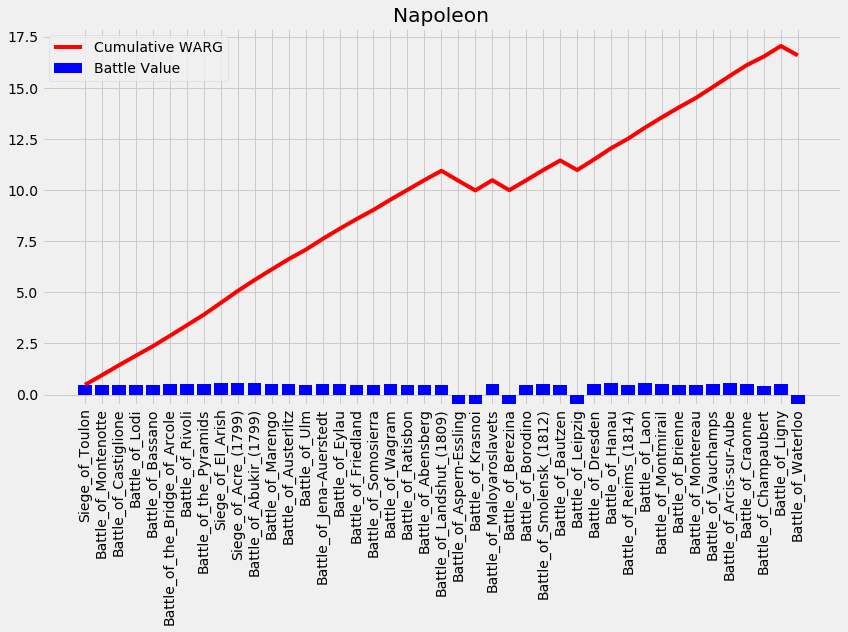

In [382]:
battle_list = []
graph('Napoleon')

In [381]:
df_battles

,Battle,General,Value,Year,cumulative
0,Battle_of_Assaye,"Arthur Wellesley, 1st Duke of Wellington",0.550234,1803.0,0.550234
1,Battle_of_Vimeiro,"Arthur Wellesley, 1st Duke of Wellington",0.478620,1808.0,1.028854
2,Second_Battle_of_Porto,"Arthur Wellesley, 1st Duke of Wellington",0.468513,1809.0,1.497367
3,Battle_of_Talavera,"Arthur Wellesley, 1st Duke of Wellington",0.485873,1809.0,1.983240
4,Battle_of_Sabugal,"Arthur Wellesley, 1st Duke of Wellington",0.499872,1811.0,2.483112
5,Siege_of_Badajoz_(1812),"Arthur Wellesley, 1st Duke of Wellington",0.417601,1812.0,2.900713
6,Siege_of_Burgos,"Arthur Wellesley, 1st Duke of Wellington",-0.603150,1812.0,2.297563
7,Siege_of_Ciudad_Rodrigo_(1812),"Arthur Wellesley, 1st Duke of Wellington",0.421465,1812.0,2.719028
8,Battle_of_Salamanca,"Arthur Wellesley, 1st Duke of Wellington",0.493339,1812.0,3.212367
9,Battle_of_the_Pyrenees,"Arthur Wellesley, 1st Duke of Wellington",0.509484,1813.0,3.721851


In [213]:
df_battles

,Battle,General,Value,cumulative
0,Battle_of_Monmouth,"Gilbert du Motier, Marquis de Lafayette",0.011364,0.011364


In [401]:
df_war = pd.DataFrame(war_list).sort('WAR', ascending = False).reset_index(drop = True)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [402]:
df_war

,General,WAR
0,Napoleon,16.768766
1,Julius Caesar,7.388536
2,"Arthur Wellesley, 1st Duke of Wellington",7.128723
3,Takeda Shingen,6.167532
4,Khalid ibn al-Walid,5.670110
5,Hannibal,5.518408
6,Ulysses S. Grant,5.001036
7,Frederick the Great,4.690729
8,Alexander the Great,4.365935
9,Oda Nobunaga,4.217273


In [399]:
import seaborn as sns

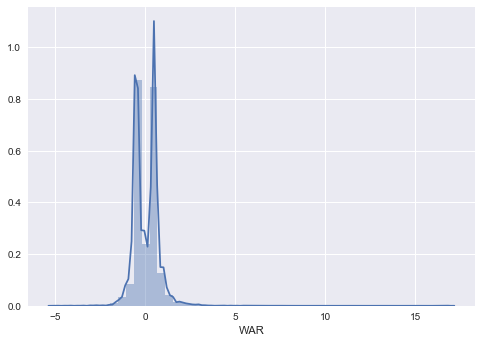

In [400]:
sns.distplot(df_war['WAR'])